# Preguntas relacionadas a los tipos de restaurantes

Primero, partimos del dataframe “restaurantes_con_distrito_barrio.csv”, al cual hemos realizado una serie de operaciones para obtener el dataframe resultante.

In [1]:
import pandas as pd
from typing import List, Dict
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("restaurantes_con_distrito_barrio.csv", index_col = 0)
df

,Name,Address,Lat,Long,Number of Ratings,Restaurant Rating,Type of Restaurant,Number of Bookmarks,Price Range,Phone Number,Website,Instagram,Facebook,Timetable,url,NOMBRE_DISTRITO,NOMBRE_BARRIO
id,,,,,,,,,,,,,,,,,
1,Freedom Cakes Diner,"Calle Cádiz 7,Madrid,Spain,28004",40.415876,-3.702805,470.0,4.5,['International'],766,Moderado,+34-910741347,http://www.freedomcakes.es/,http://www.instagram.com/freedomcakes,http://facebook.com/Freedomcakesvegan,"{'Monday': '08:00 - 00:00', 'Tuesday': '08:00 ...",https://www.happycow.net/reviews/freedom-cakes...,Centro,Sol
2,Mad Mad Vegan - Chueca,"Calle Pelayo 19,Madrid,Spain,28004",40.422698,-3.698609,410.0,5.0,"['American', 'Mexican']",612,Moderado,+34-914442077,https://madmadvegan.com/,http://www.instagram.com/madmadvegan,http://facebook.com/MADMADVEGAN,"{'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...",https://www.happycow.net/reviews/mad-mad-madri...,Centro,Justicia
3,Frutas Prohibidas,"Calle del Conde Duque, 26,Madrid,Spain,28015",40.427467,-3.710349,241.0,5.0,"['International', 'Fusion']",555,Moderado,+34-911525533,http://www.frutasprohibidas.com/,http://www.instagram.com/frutasprohibidasbar,http://facebook.com/frutasprohibidasbar,"{'Monday': 'Closed', 'Tuesday': 'Closed', 'Wed...",https://www.happycow.net/reviews/frutas-prohib...,Centro,Universidad
4,Mad Mad Vegan - Lavapiés,"Lavapiés 16,Madrid,Spain,28012",40.411113,-3.703039,216.0,4.5,"['American', 'Mexican']",465,Moderado,+34-910665299,https://madmadvegan.com/,http://www.instagram.com/madmadvegan,http://facebook.com/MADMADVEGAN,"{'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...",https://www.happycow.net/reviews/mad-mad-vegan...,Centro,Embajadores
5,Flower Burger,"Calle Luchana 13, Chamberí,Madrid,Spain,28010",40.430001,-3.701037,14.0,4.5,"['American', 'Western']",47,Barato,+34-910328968,https://www.flowerburger.it/,http://www.instagram.com/flowerburger_es,http://facebook.com/flowerburger.it,"{'Monday': '13:00 - 16:30, 19:30 - 23:30', 'Tu...",https://www.happycow.net/reviews/flower-burger...,Chamberi,Ríos Rosas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,Morgano Crafted Beers,"Alamo 2, Boadilla del Monte, Madrid, Spain, 28660",40.405759,-3.876917,1.0,4.0,"['Middle Eastern', 'Spanish']",2,Barato,+34-695635423,No website,No instagram,http://facebook.com/MorganoCraftedBeers,"{'Monday': '19:00 - 01:00', 'Tuesday': '19:00 ...",https://www.happycow.net/reviews/morgano-craft...,NaN,NaN
745,Adagio Gelateria,"Avenida de Adolfo Suárez, 7, Boadilla Del Mont...",40.405413,-3.876999,1.0,4.0,['Italian'],0,No price range,+34-912859853,No website,http://www.instagram.com/adagiogelateria,http://facebook.com/adagiogelateria,"{'Monday': '10:00 - 22:30', 'Tuesday': '10:00 ...",https://www.happycow.net/reviews/adagio-gelate...,NaN,NaN
746,La Huella Vegana,"Calle de las Trece Rosas, 2,Rivas-vaciamadrid,...",40.376390,-3.540020,31.0,4.5,"['Western', 'Spanish']",42,Moderado,+34-917139958,http://www.lahuellavegana.com/,No instagram,http://facebook.com/lahuellavegana,"{'Monday': '08:30 - 23:00', 'Tuesday': '08:30 ...",https://www.happycow.net/reviews/la-huella-riv...,NaN,NaN


La información obtenida de cada tipo la guardaremos en el diccionario “total_tipos” para posteriormente transformarlo en un dataframe.
A partir de una lista predefinida con todos los tipos de restaurantes, iteramos sobre el dataframe, seleccionando los restaurantes cuya columna "Type of Restaurant" incluye cada tipo correspondiente, guardándose en “filtro_tipo”.

In [2]:
import pandas as pd
from typing import List, Dict

tipos_restaurantes: List[str] = [
    "Korean", "African", "American", "Asian", "Australian", "Brazilian", "British", 
    "Caribbean", "Chinese", "European", "French", "Fusion", "German", "Indian", 
    "International", "Italian", "Japanese", "Latin", "Mediterranean", "Mexican", 
    "Middle Eastern", "Spanish", "Taiwanese", "Thai", "Vietnamese", "Western"
]

total_tipos: Dict[str, Dict[str, float]] = {}
transform_prices = {
    "Barato": 1,
    "Moderado": 2,
    "Caro": 3,
    "No price range": 0
}
# Modificamos los precios para otorgarles un valor numérico

df = df.replace(transform_prices)

for tipo in tipos_restaurantes:
    filtro_tipo = df[df["Type of Restaurant"].str.contains(tipo, case=False, na=False)].copy()
    # Seleccionamos aquellos restaurantes que contengan en su lista de tipos, el tipo pedido
    
    conteo_distritos = filtro_tipo["NOMBRE_DISTRITO"].value_counts()
    conteo_barrio = filtro_tipo["NOMBRE_BARRIO"].value_counts()

    distrito_mas_frecuente = conteo_distritos.idxmax()
    barrio_mas_frecuente = conteo_barrio.idxmax()
    # Selección del distrito y del barrio que más aparece

    numero_tipo = len(filtro_tipo)
    numero_reviews = int(filtro_tipo["Number of Ratings"].sum())
    numero_bookmarks = int(filtro_tipo["Number of Bookmarks"].sum())

    if numero_reviews > 0:
        distribucion = (filtro_tipo["Number of Ratings"] / numero_reviews) * filtro_tipo["Restaurant Rating"]
        media_ponderada = round(distribucion.sum(), 3)
    else:
        media_ponderada = 0
    # Hacer la media ponderada de los ratings

    valid_prices = filtro_tipo[filtro_tipo["Price Range"] != 0]["Price Range"]
    #Selección de sólo aquellos restaurantes que especifican el precio

    if len(valid_prices) > 0:
        media_precios = (valid_prices.sum() / len(valid_prices))
    else:
        media_precios = 0
    # Media de los precios y redondeando al entero más cercano

    media_reviews = round(numero_reviews/numero_tipo, 3)
    media_bookmarks = round(numero_bookmarks/numero_tipo, 3)

    if  media_precios == 1:
        media_precios = "Barato 1"
    elif 1 < media_precios < 1.25:
        media_precios = "Barato 2"
    elif 1.25 <= media_precios < 1.5:
        media_precios = "Barato 3"
    elif 1.5 <= media_precios < 1.75:
        media_precios = "Moderado 1"
    elif 1.75 <= media_precios < 2:
        media_precios = "Moderado 2"
    elif 2 <= media_precios < 2.25:
        media_precios = "Moderado 3"
    elif 2.25 <= media_precios < 2.5:
        media_precios = "Caro 1"
    elif 2.5 <= media_precios < 2.75:
        media_precios = "Caro 2"
    elif 2.75 <= media_precios < 3:
        media_precios = "Caro 3"


    total_tipos[tipo] = {
        "total": numero_tipo,
        "reviews": numero_reviews,
        "Media reviews": media_reviews,
        "Número bookmarks": numero_bookmarks,
        "Media bookmarks": media_bookmarks,
        "MP rating": media_ponderada,
        "Media precio": media_precios,
        "Distrito más frecuente": distrito_mas_frecuente,
        "Barrio más frecuente": barrio_mas_frecuente
    }

df_total_tipos = pd.DataFrame.from_dict(total_tipos)

df_def = df_total_tipos.T

df_def.to_csv("df_tipos.csv")


C:\Users\josej\AppData\Local\Temp\ipykernel_6288\2048577953.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(transform_prices)


# Se destaca: 
 1. Reemplazamos los valores “Barato”, “Moderado”, “Caro” y ”No price range” a los enteros 1, 2, 3 y 0 respectivamente, para poder realizar cálculos numéricos.

 2. Media ponderada de los ratings para cada tipo de restaurante. Para calcularla, primero se determina la proporción de reseñas que representa cada restaurante con respecto al total de reseñas. Luego, esta proporción se multiplica por el rating correspondiente del restaurante. Estas operaciones se realizan utilizando las columnas “Number of Ratings” y “Restaurant Rating”. El resultado final es la suma de todos estos productos, redondeando hasta el tercer decimal. Si no existen reseñas, la media ponderada se asigna como 0 para evitar divisiones entre 0.

 3. Para estimar el rango de precios de los restaurantes, se filtran aquellos con valores válidos en la columna de precios, excluyendo los etiquetados como "No price range". Estos valores se almacenan en “valid_prices” y se calcula su media. Luego, se clasifica el rango de precios usando una escala Adjetivo + Número (1-3), donde 1 es el más barato y 3 el más caro dentro de cada segmento.

 4. Convertimos el diccionario “total_tipos” en el dataframe “df_total_tipos” con la función Dataframe.from_dict, y se guarda la traspuesta del dataframe en “df_def”.

# Visualización del dataframe
Para visualizar los datos, ordenamos el dataframe df_def según las columnas “reviews” (total_reviews_ordenados), “total” (total_tipos_ordenados) y “MP rating” (total_rating_ordenados). De cada ordenación, mostramos los 10 primeros y los 10 últimos valores.

In [3]:
total_reviews_ordenados = df_def.sort_values("reviews", ascending=False)
total_reviews_ordenados[:10]

,total,reviews,Media reviews,Número bookmarks,Media bookmarks,MP rating,Media precio,Distrito más frecuente,Barrio más frecuente
Spanish,227,4898,21.577,9427,41.529,4.419,Moderado 1,Centro,Embajadores
International,101,2370,23.465,4482,44.376,4.403,Moderado 2,Centro,Embajadores
Mediterranean,120,2351,19.592,4429,36.908,4.397,Moderado 1,Centro,Embajadores
Western,80,1558,19.475,2714,33.925,4.437,Moderado 2,Centro,Universidad
Fusion,61,1519,24.902,2710,44.426,4.431,Moderado 2,Centro,Universidad
American,85,1356,15.953,2305,27.118,4.49,Moderado 2,Centro,Universidad
European,124,1241,10.008,2538,20.468,4.164,Moderado 2,Centro,Embajadores
Italian,86,1078,12.535,2062,23.977,4.565,Moderado 2,Centro,Embajadores
Mexican,37,1006,27.189,1614,43.622,4.572,Moderado 1,Centro,Justicia
Asian,86,412,4.791,948,11.023,3.823,Moderado 2,Centro,Embajadores


In [4]:
total_reviews_ordenados[-10:]

,total,reviews,Media reviews,Número bookmarks,Media bookmarks,MP rating,Media precio,Distrito más frecuente,Barrio más frecuente
African,7,25,3.571,73,10.429,3.92,Moderado 1,Centro,Embajadores
Indian,7,22,3.143,63,9.0,3.818,Moderado 2,Centro,Embajadores
French,6,19,3.167,43,7.167,3.211,Barato 3,Centro,Universidad
Australian,2,18,9.0,25,12.5,3.806,Moderado 3,Centro,Palacio
Taiwanese,1,13,13.0,26,26.0,3.5,Barato 1,Centro,Cortes
Korean,4,10,2.5,51,12.75,3.4,Moderado 3,Centro,Palacio
Caribbean,3,5,1.667,26,8.667,3.2,Barato 3,Centro,Palacio
Vietnamese,3,5,1.667,11,3.667,3.6,Moderado 1,Centro,Embajadores
German,2,1,0.5,4,2.0,4.0,Moderado 3,Vicalvaro,Casco Histórico de Vicálvaro
British,1,0,0.0,0,0.0,0,Moderado 3,Centro,Universidad


In [5]:
total_tipos_ordenados = df_def.sort_values("total", ascending=False)
total_tipos_ordenados[:10]


,total,reviews,Media reviews,Número bookmarks,Media bookmarks,MP rating,Media precio,Distrito más frecuente,Barrio más frecuente
Spanish,227,4898,21.577,9427,41.529,4.419,Moderado 1,Centro,Embajadores
European,124,1241,10.008,2538,20.468,4.164,Moderado 2,Centro,Embajadores
Mediterranean,120,2351,19.592,4429,36.908,4.397,Moderado 1,Centro,Embajadores
International,101,2370,23.465,4482,44.376,4.403,Moderado 2,Centro,Embajadores
Italian,86,1078,12.535,2062,23.977,4.565,Moderado 2,Centro,Embajadores
Asian,86,412,4.791,948,11.023,3.823,Moderado 2,Centro,Embajadores
American,85,1356,15.953,2305,27.118,4.49,Moderado 2,Centro,Universidad
Western,80,1558,19.475,2714,33.925,4.437,Moderado 2,Centro,Universidad
Fusion,61,1519,24.902,2710,44.426,4.431,Moderado 2,Centro,Universidad
Japanese,54,271,5.019,556,10.296,3.873,Moderado 2,Centro,Justicia


In [6]:
total_tipos_ordenados[-10:]


,total,reviews,Media reviews,Número bookmarks,Media bookmarks,MP rating,Media precio,Distrito más frecuente,Barrio más frecuente
African,7,25,3.571,73,10.429,3.92,Moderado 1,Centro,Embajadores
French,6,19,3.167,43,7.167,3.211,Barato 3,Centro,Universidad
Thai,5,26,5.2,54,10.8,3.5,Moderado 3,Centro,Sol
Korean,4,10,2.5,51,12.75,3.4,Moderado 3,Centro,Palacio
Caribbean,3,5,1.667,26,8.667,3.2,Barato 3,Centro,Palacio
Vietnamese,3,5,1.667,11,3.667,3.6,Moderado 1,Centro,Embajadores
German,2,1,0.5,4,2.0,4.0,Moderado 3,Vicalvaro,Casco Histórico de Vicálvaro
Australian,2,18,9.0,25,12.5,3.806,Moderado 3,Centro,Palacio
British,1,0,0.0,0,0.0,0,Moderado 3,Centro,Universidad
Taiwanese,1,13,13.0,26,26.0,3.5,Barato 1,Centro,Cortes


In [7]:
total_rating_ordenados = df_def.sort_values("MP rating", ascending=False)
total_rating_ordenados[:10]

,total,reviews,Media reviews,Número bookmarks,Media bookmarks,MP rating,Media precio,Distrito más frecuente,Barrio más frecuente
Middle Eastern,34,335,9.853,652,19.176,4.578,Moderado 2,Centro,Universidad
Mexican,37,1006,27.189,1614,43.622,4.572,Moderado 1,Centro,Justicia
Brazilian,8,35,4.375,105,13.125,4.571,Moderado 2,Centro,Justicia
Italian,86,1078,12.535,2062,23.977,4.565,Moderado 2,Centro,Embajadores
American,85,1356,15.953,2305,27.118,4.49,Moderado 2,Centro,Universidad
Western,80,1558,19.475,2714,33.925,4.437,Moderado 2,Centro,Universidad
Fusion,61,1519,24.902,2710,44.426,4.431,Moderado 2,Centro,Universidad
Spanish,227,4898,21.577,9427,41.529,4.419,Moderado 1,Centro,Embajadores
International,101,2370,23.465,4482,44.376,4.403,Moderado 2,Centro,Embajadores
Mediterranean,120,2351,19.592,4429,36.908,4.397,Moderado 1,Centro,Embajadores


In [8]:
total_rating_ordenados[-10:]

,total,reviews,Media reviews,Número bookmarks,Media bookmarks,MP rating,Media precio,Distrito más frecuente,Barrio más frecuente
Indian,7,22,3.143,63,9.0,3.818,Moderado 2,Centro,Embajadores
Australian,2,18,9.0,25,12.5,3.806,Moderado 3,Centro,Palacio
Chinese,19,246,12.947,485,25.526,3.803,Barato 3,Centro,Sol
Vietnamese,3,5,1.667,11,3.667,3.6,Moderado 1,Centro,Embajadores
Taiwanese,1,13,13.0,26,26.0,3.5,Barato 1,Centro,Cortes
Thai,5,26,5.2,54,10.8,3.5,Moderado 3,Centro,Sol
Korean,4,10,2.5,51,12.75,3.4,Moderado 3,Centro,Palacio
French,6,19,3.167,43,7.167,3.211,Barato 3,Centro,Universidad
Caribbean,3,5,1.667,26,8.667,3.2,Barato 3,Centro,Palacio
British,1,0,0.0,0,0.0,0,Moderado 3,Centro,Universidad


Este análisis permite responder preguntas como: ¿Cuáles son los tipos de restaurantes más abundantes, los que tienen más reseñas y los mejor valorados? Asimismo, identifica los tipos menos comunes, con menos reseñas y peor valorados.

# Diagramas

También presentamos diagramas de tarta para ilustrar la distribución de los tipos de restaurante, las reseñas por tipo de restaurante y los barrios más frecuentes, mostrando la proporción de cada valor. En algunos casos, hemos agrupado los 10 a 15 últimos valores en una categoría única, asignándoles la etiqueta "otros" para simplificar la visualización.

Text(0.5, 1.0, 'Tipos de restaurante')

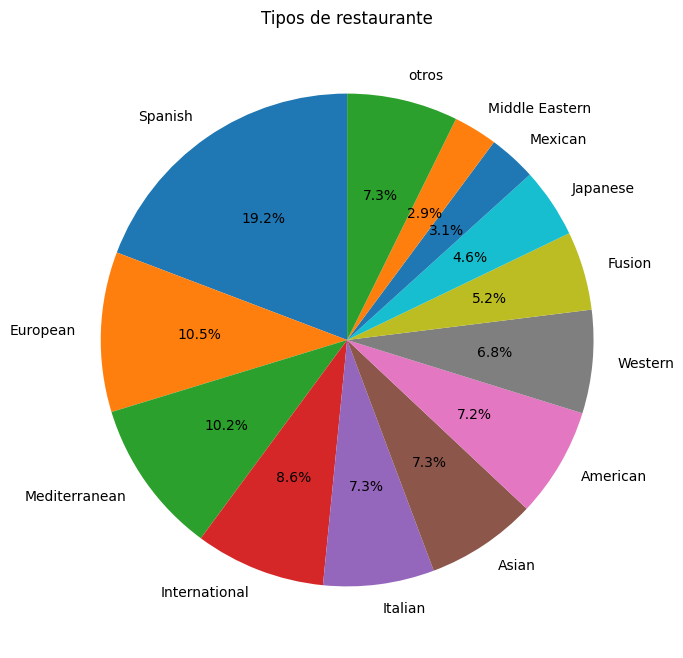

In [9]:
plt.figure(figsize=(8, 8))
solo_tipos_ordenados = total_tipos_ordenados["total"]
ultimos = solo_tipos_ordenados[-14:].sum()
index_ultimos = solo_tipos_ordenados[-14:].index
sin_ultimos = solo_tipos_ordenados.drop(index_ultimos)
sin_ultimos["otros"] = ultimos
plt.pie(
    sin_ultimos.values, 
    labels=sin_ultimos.index, 
    autopct='%1.1f%%', 
    startangle=90 
)
plt.title("Tipos de restaurante")


Text(0.5, 1.0, 'Reviews por tipo')

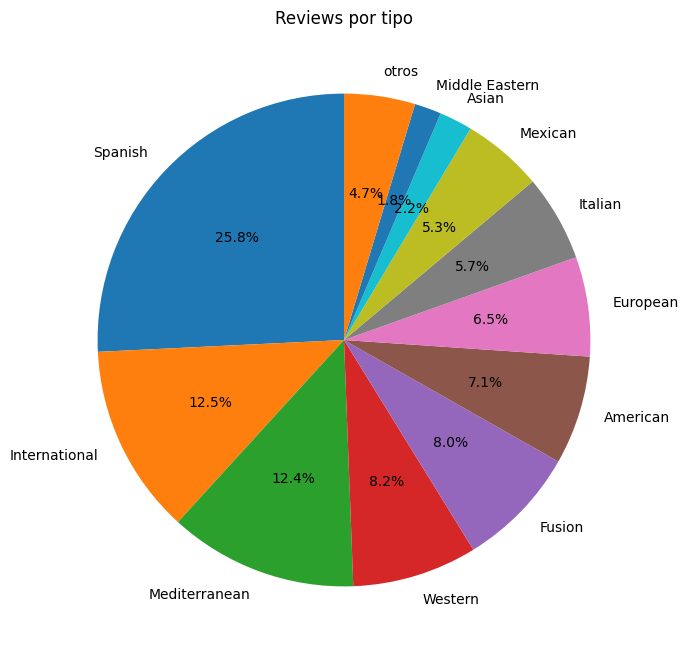

In [10]:
plt.figure(figsize=(8, 8))
solo_reviews_ordenados = total_reviews_ordenados["reviews"]
ultimos_r = solo_reviews_ordenados[-15:].sum()
index_ultimos_r = solo_reviews_ordenados[-15:].index
sin_ultimos_r = solo_reviews_ordenados.drop(index_ultimos_r)
sin_ultimos_r["otros"] = ultimos_r
plt.pie(
    sin_ultimos_r.values, 
    labels=sin_ultimos_r.index, 
    autopct='%1.1f%%', 
    startangle=90 
)
plt.title("Reviews por tipo")

Text(0.5, 1.0, 'Barrios más frecuentes')

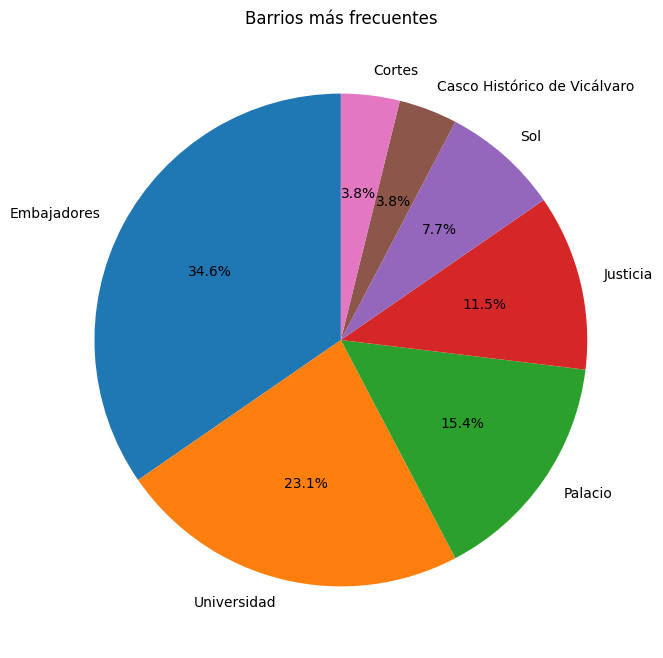

In [11]:
barrios = df_def["Barrio más frecuente"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(
    barrios.values, 
    labels=barrios.index, 
    autopct='%1.1f%%', 
    startangle=90 
)
plt.title("Barrios más frecuentes")

Además, incluimos diagramas de cajas para mostrar la distribución de los restaurantes según la media ponderada de los ratings, el número de reseñas y la cantidad de restaurantes de cada tipo. En cada diagrama, superponemos puntos que representan los valores correspondientes a cada tipo de restaurante, lo que permite identificar posibles valores atípicos.

Text(0.5, 1.0, 'Total')

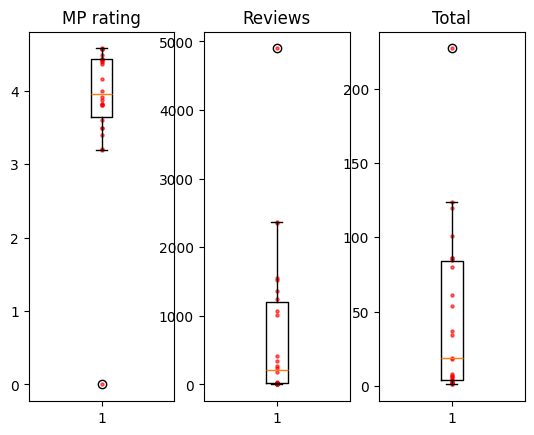

In [12]:
plt.subplot(1,3,1)
plt.boxplot(df_def["MP rating"])
plt.scatter(np.ones(len(df_def["MP rating"])), df_def["MP rating"], alpha=0.6, color='red', s=5)
plt.title("MP rating")
plt.subplot(1,3,2)
plt.boxplot(df_def["reviews"])
plt.scatter(np.ones(len(df_def["reviews"])), df_def["reviews"], alpha=0.6, color='red', s=5)
plt.title("Reviews")
plt.subplot(1,3,3)
plt.boxplot(df_def["total"])
plt.scatter(np.ones(len(df_def["total"])), df_def["total"], alpha=0.6, color='red', s=5)
plt.title("Total")